In [1]:
#import important library such as pandas, seaborn, sklearn etc.

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#import data from csv to dataframe using pandas..
df = pd.read_csv('cars.csv')

#as if you see dataframe, column name contain spaces on left side for convenience removing it... 
df.columns = df.columns.str.replace(' ', '')

In [3]:
# in data there is 3 brand US, Europe and Japan as categorical variable,
# converting categorical variable to numerical variable....

le = LabelEncoder().fit(df['brand'])
df['brand'] = le.transform(df['brand'])


#we have certain blank spaces value which needed to remove at start..
df = df.loc[df.cubicinches != ' ']
df = df.loc[df.weightlbs != ' ']


# both column have object type lets convert it to integer type.
df[['cubicinches', 'weightlbs']] = df[['cubicinches', 'weightlbs']].astype(int)

In [4]:
# as we have converted brand into numerical value for refrence vcalue mapping.
L = list(le.inverse_transform(df['brand']))
d = dict(zip(le.classes_, le.transform(le.classes_)))
print (d)

{' Europe.': 0, ' Japan.': 1, ' US.': 2}


In [5]:
#check info of data..
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 260
Data columns (total 8 columns):
mpg            256 non-null float64
cylinders      256 non-null int64
cubicinches    256 non-null int64
hp             256 non-null int64
weightlbs      256 non-null int64
time-to-60     256 non-null int64
year           256 non-null int64
brand          256 non-null int64
dtypes: float64(1), int64(7)
memory usage: 18.0 KB


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


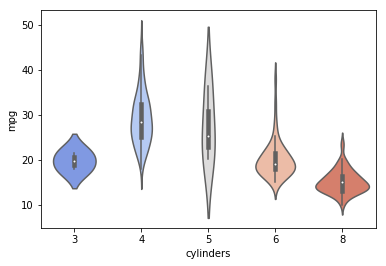

In [237]:
sns.violinplot('cylinders','mpg',data=df,palette='coolwarm')

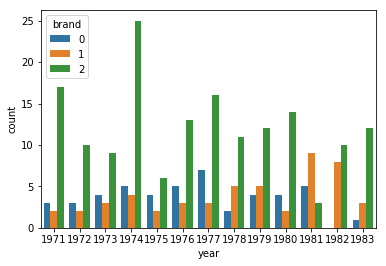

In [293]:
sns.countplot(x='year',hue='brand',data=df)

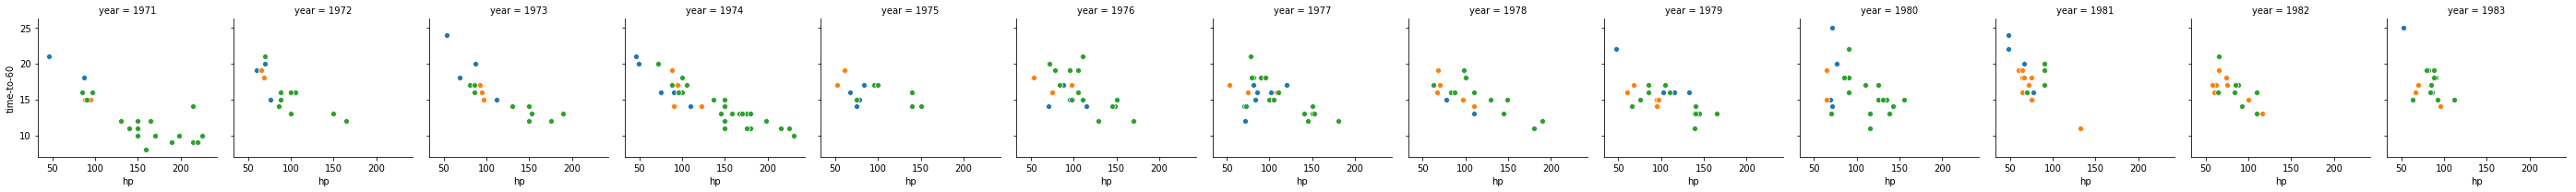

In [258]:
g = sns.FacetGrid(col='year',hue='brand',data=df,legend_out=False)
g.map(sns.scatterplot,'hp','time-to-60')

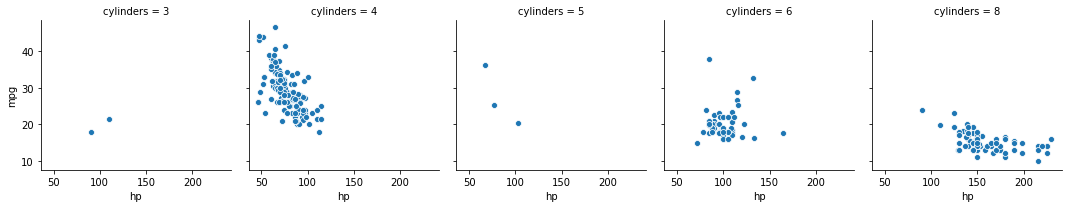

In [262]:
g = sns.FacetGrid(col='cylinders',data=df,legend_out=False)
g.map(sns.scatterplot,'hp','mpg')

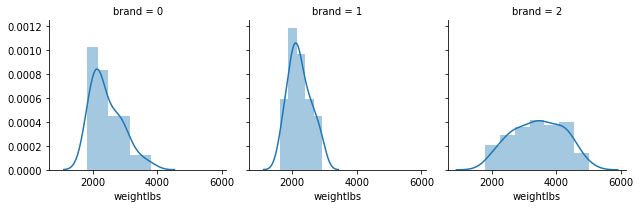

In [282]:
g = sns.FacetGrid(col='brand',data=df,legend_out=False)
g.map(sns.distplot,'weightlbs')

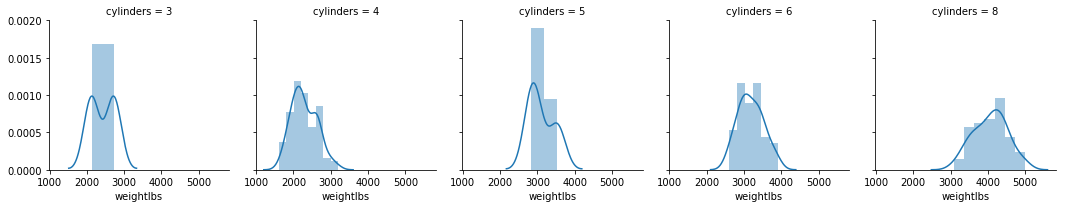

In [289]:
g = sns.FacetGrid(col='cylinders',data=df,legend_out=False)
g.map(sns.distplot,'weightlbs')

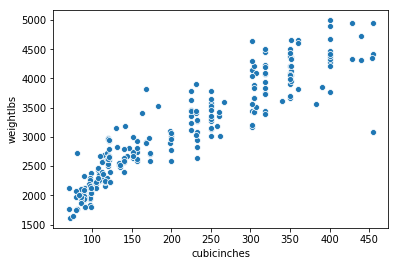

In [91]:
sns.scatterplot(df.cubicinches,df.weightlbs)

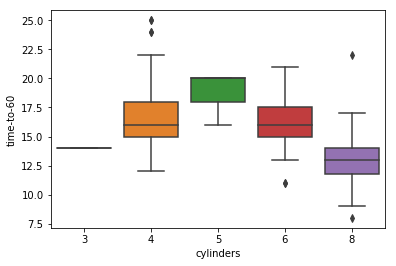

In [104]:
sns.boxplot('cylinders','time-to-60',data=df)

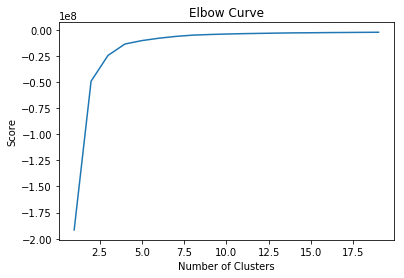

In [9]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

In [11]:
df['cluster'] = kmeans.labels_

In [104]:
df.loc[df.cluster == 0].count()

mpg            122
cylinders      122
cubicinches    122
hp             122
weightlbs      122
time-to-60     122
year           122
brand          122
id             122
cluster        122
dtype: int64

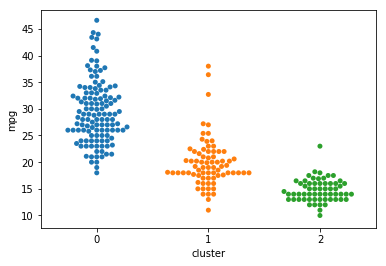

In [66]:
sns.swarmplot(df.cluster,df.mpg)

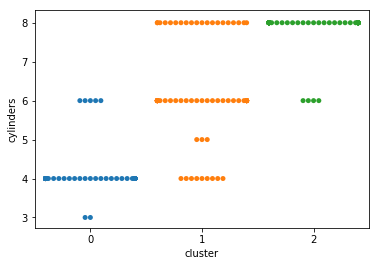

In [70]:
sns.swarmplot(df.cluster,df.cylinders)

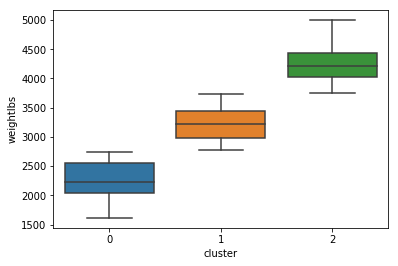

In [72]:
sns.boxplot(df.cluster,df.weightlbs)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


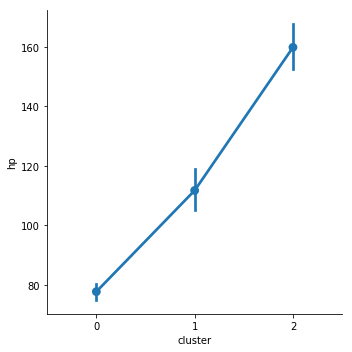

In [73]:
sns.factorplot('cluster','hp',data=df)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


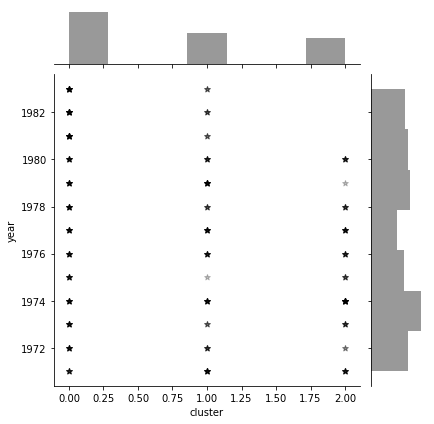

In [101]:
sns.jointplot(x='cluster', y='year', data=df, alpha=.25,
              color='k', marker='*')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


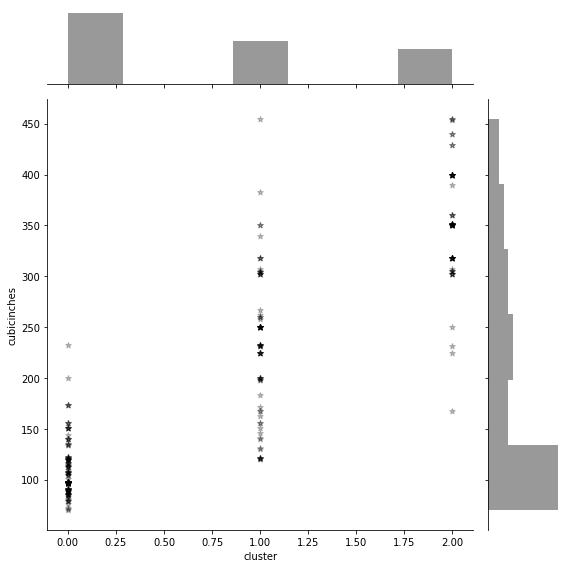

In [95]:
sns.jointplot(x='cluster', y='cubicinches', data=df, size=8, alpha=.25,
              color='k', marker='*')

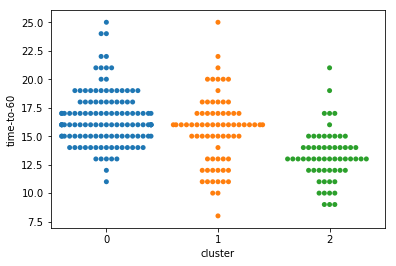

In [99]:
sns.swarmplot(df.cluster,df['time-to-60'])

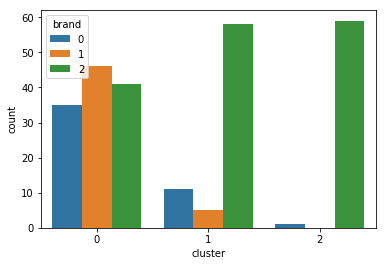

In [100]:
sns.countplot(x='cluster',hue='brand',data=df)